In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("books.csv", sep=",")
df2 = pd.read_csv("to_read.csv", sep=",")

In [3]:
df

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [18]:
df2

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874
...,...,...
912700,53424,4716
912701,53424,4844
912702,53424,5907
912703,53424,7569


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [4]:
#Question 3
def normalize(Df, features_list):
    result = Df.copy()
    for feature_name in features_list:
        max_value = Df[feature_name].max()
        min_value = Df[feature_name].min()
        result[feature_name] = (Df[feature_name] - min_value) / (max_value - min_value)
    return result

In [12]:
#normalize ratings data
new_data = normalize(df, [['ratings_1'],['ratings_2'],['ratings_3'],['ratings_4'],['ratings_5']])
new_data

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,0.146223,0.292844,0.705891,1.000000,0.898623,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,0.165489,0.232721,0.573396,0.780497,1.000000,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,1.000000,1.000000,1.000000,0.590537,0.449944,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,0.132439,0.268756,0.563070,0.676234,0.569124,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,0.189015,0.452389,0.763982,0.631697,0.314524,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,0.000206,0.001248,0.004054,0.004802,0.002001,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,0.000640,0.001193,0.001783,0.001782,0.002065,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,0.000000,0.000185,0.001095,0.002357,0.001470,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,0.000579,0.002225,0.004341,0.002585,0.000538,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


Text(0.5, 1.0, 'Ratings Distribution')

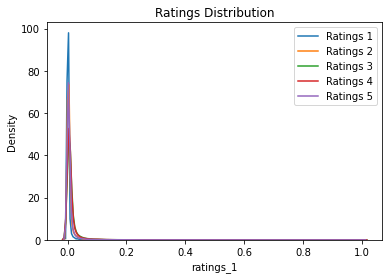

In [16]:
#Ratings_Distribution
sns.kdeplot(new_data.ratings_1, label = 'Ratings 1')
sns.kdeplot(new_data.ratings_2, label = 'Ratings 2')
sns.kdeplot(new_data.ratings_3, label = 'Ratings 3')
sns.kdeplot(new_data.ratings_4, label = 'Ratings 4')
sns.kdeplot(new_data.ratings_5, label = 'Ratings 5')
plt.legend()
plt.title("Ratings Distribution")

In [20]:
#Question 4
df3 = pd.merge(df,df2,on="book_id",how="left")
df3

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,NaN
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,61.0
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,590.0
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,632.0
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96677,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,32653.0
96678,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,34881.0
96679,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,38076.0
96680,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...,45187.0


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96682 entries, 0 to 96681
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         96682 non-null  int64  
 1   book_id                    96682 non-null  int64  
 2   best_book_id               96682 non-null  int64  
 3   work_id                    96682 non-null  int64  
 4   books_count                96682 non-null  int64  
 5   isbn                       95393 non-null  object 
 6   isbn13                     95687 non-null  float64
 7   authors                    96682 non-null  object 
 8   original_publication_year  95451 non-null  float64
 9   original_title             93127 non-null  object 
 10  title                      96682 non-null  object 
 11  language_code              89517 non-null  object 
 12  average_rating             96682 non-null  float64
 13  ratings_count              96682 non-null  int

In [24]:
df3["user_id"] = df3["user_id"].fillna(0)
print(df3)

          id  book_id  best_book_id  work_id  books_count       isbn  \
0          1  2767052       2767052  2792775          272  439023483   
1          2        3             3  4640799          491  439554934   
2          2        3             3  4640799          491  439554934   
3          2        3             3  4640799          491  439554934   
4          2        3             3  4640799          491  439554934   
...      ...      ...           ...      ...          ...        ...   
96677  10000     8914          8914    11817           31  375700455   
96678  10000     8914          8914    11817           31  375700455   
96679  10000     8914          8914    11817           31  375700455   
96680  10000     8914          8914    11817           31  375700455   
96681  10000     8914          8914    11817           31  375700455   

             isbn13                      authors  original_publication_year  \
0      9.780439e+12              Suzanne Collins        

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96682 entries, 0 to 96681
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         96682 non-null  int64  
 1   book_id                    96682 non-null  int64  
 2   best_book_id               96682 non-null  int64  
 3   work_id                    96682 non-null  int64  
 4   books_count                96682 non-null  int64  
 5   isbn                       95393 non-null  object 
 6   isbn13                     95687 non-null  float64
 7   authors                    96682 non-null  object 
 8   original_publication_year  95451 non-null  float64
 9   original_title             93127 non-null  object 
 10  title                      96682 non-null  object 
 11  language_code              89517 non-null  object 
 12  average_rating             96682 non-null  float64
 13  ratings_count              96682 non-null  int

In [36]:
df3 = df3[(df3['user_id']!=0)]

In [37]:
df4 = df3.groupby(['user_id']).mean()
df4

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
user_id,,,,,,,,,,,,,,,,
1.0,1262.000000,112.00,112.0,3.634573e+06,116.000000,9.780441e+12,1976.00,3.900000,74133.0,79736.000000,1374.000000,861.000000,4425.000000,20138.000000,30723.000000,23589.000000
2.0,459.250000,375.25,96913.0,2.535306e+06,538.750000,9.780318e+12,1298.50,4.065000,370823.0,402224.000000,7911.250000,8287.000000,18617.000000,65997.250000,122965.000000,186357.750000
3.0,3753.000000,10.00,10.0,2.145757e+07,6.000000,9.780440e+12,2005.00,4.730000,24618.0,26274.000000,882.000000,203.000000,186.000000,946.000000,3891.000000,21048.000000
5.0,7098.000000,2123.00,2123.0,3.550874e+06,33.000000,9.780502e+12,1944.00,3.960000,14074.0,14382.000000,469.000000,714.500000,632.500000,2069.500000,4239.000000,6726.500000
6.0,2867.000000,1319.00,1319.0,7.221040e+05,29.000000,9.780447e+12,2002.00,4.070000,31399.0,37038.000000,3578.000000,992.000000,2088.000000,6294.000000,11688.000000,15976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53417.0,3314.666667,163.00,163.0,7.638852e+06,49.333333,9.780377e+12,1998.00,4.343333,36903.0,38804.333333,1837.333333,399.333333,1008.000000,4527.666667,10252.000000,22617.333333
53419.0,4298.000000,668.00,668.0,1.711534e+06,63.000000,9.780451e+12,1936.00,3.890000,20994.0,22571.000000,1178.000000,647.000000,1531.000000,5121.000000,7689.000000,7583.000000
53420.0,2853.333333,475.00,475.0,2.469815e+06,157.666667,9.780478e+12,1989.00,4.160000,613961.0,654644.000000,10880.333333,2539.000000,8407.666667,58433.000000,177205.666667,408058.666667


In [38]:
df5 = df3.groupby(['user_id']).count()
df5

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53417.0,3,3,3,3,3,3,3,3,3,2,...,3,3,3,3,3,3,3,3,3,3
53419.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
53420.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


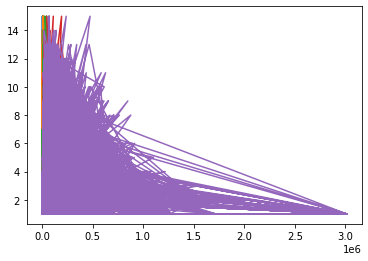

In [41]:
plt.plot(df4.ratings_1, df5.ratings_1)
plt.plot(df4.ratings_2, df5.ratings_2)
plt.plot(df4.ratings_3, df5.ratings_3)
plt.plot(df4.ratings_4, df5.ratings_4)
plt.plot(df4.ratings_5, df5.ratings_5)
plt.show()